**Data Collection:** \\
Reference :Luis M. Candanedo, Véronique Feldheim,"Accurate occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models", Energy and Buildings. Volume 112, 15 January 2016, Pages 28-39.

Data source: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#

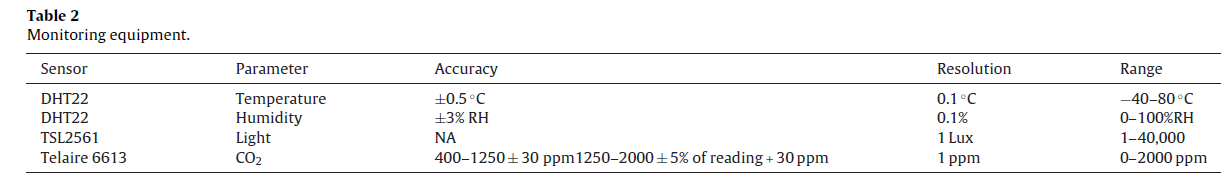




datatest.txt : \\
datatraining.txt : \\
datatest2.txt : 

**Importing Libraries and Data Visualization** 

Number of features= 7


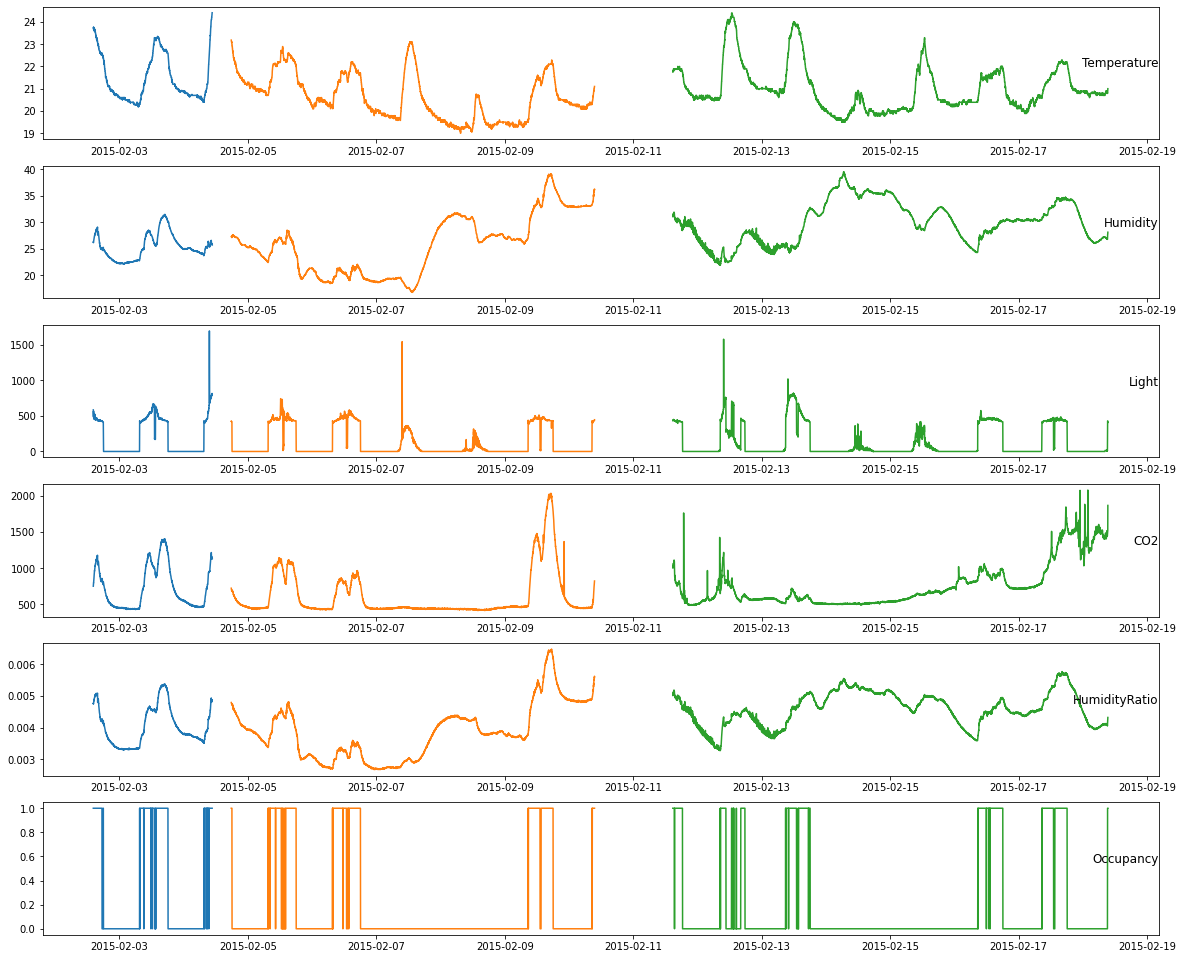

In [ ]:
#import all the necessary libraries
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt 

# load all data
data1 = read_csv('datatest.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
data2 = read_csv('datatraining.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
data3 = read_csv('datatest2.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
# determine the number of features
n_features = data1.values.shape[1]
print('Number of features=', n_features)

#visualize each of the variables 
plt.figure(figsize=(20,20)) # define a size of the figure
for i in range(1, n_features):
    # specify the subplot
    plt.subplot(n_features, 1, i) #use plt.subplot to create multiple plots in 1 figure
    # plot data from each set
    plt.plot(data1.index, data1.values[:, i]) # taking data from the data1 file for the ith feature 
    plt.plot(data2.index, data2.values[:, i]) # taking data from the data2 file for the ith feature 
    plt.plot(data3.index, data3.values[:, i]) # taking data from the data3 file for the ith feature 
    # add a readable name to the plot
    plt.title(data1.columns[i], y=0.5, loc='right')
plt.show()

In [ ]:
#print out the first 5 rows from the top
data1.head()

,no,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-02 14:19:00,140,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,141,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,142,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,143,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,144,23.7540,26.200,488.600000,779.000000,0.004767,1


**Data Preprocessing**

In [ ]:
#combine all the three dataset into 1 single dataset
data = pd.concat([data1, data2, data3])

# drop row number
data.drop('no', axis=1, inplace=True)  # axis =1 means drop all the elements in that column, inplace means it shift the other columns accordingly.

# save aggregated dataset
data.to_csv('combined.csv')

**Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split  #importing the train_test_split function from the sklearn library
# load the dataset
data = read_csv('combined.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = data.values
# separate the data into input variables (Temp, Humidity, HumidityRatio, Light, CO2) and output variable (Occupancy)
X, y = values[:, :-1], values[:, -1]  # X contains all the input variables, y contains the output; the last column is the output variable
# split the dataset
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=1)

In [ ]:
print(trainX)
print(trainy)

[[2.37000000e+01 2.62720000e+01 5.85200000e+02 7.49200000e+02
  4.76416302e-03]
 [2.37180000e+01 2.62900000e+01 5.78400000e+02 7.60400000e+02
  4.77266099e-03]
 [2.37300000e+01 2.62300000e+01 5.72666667e+02 7.69666667e+02
  4.76515255e-03]
 ...
 [1.97900000e+01 3.62675000e+01 0.00000000e+00 5.06333333e+02
  5.18218665e-03]
 [1.97900000e+01 3.62900000e+01 0.00000000e+00 5.10333333e+02
  5.18542843e-03]
 [1.97900000e+01 3.62900000e+01 0.00000000e+00 5.10000000e+02
  5.18542843e-03]]
[1. 1. 1. ... 0. 0. 0.]


### **Model Development and Analysis**

In [ ]:
#import the necessary functions
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#define an instance of the LogisticRegression class
model = LogisticRegression(penalty="l2",C=1.0,fit_intercept=True,max_iter=100)  
'''
penalty= the regularization applied on the model. 'l1' or 'l2'
C= the inverse of regularization strength
fit_intercept= have the beta0 term as well in the equation
max_iter= maximum number of iterations
'''
# fit the model on the training set
model.fit(trainX, trainy) # fit function determines the coefficients using the maximum likelihood estimate (MLE) method.

# predict the test set
yhat = model.predict(testX) # Prediction using the test data

In [ ]:
#display the output classes of the model
model.classes_

array([0., 1.])

In [ ]:
#print out the model parameters beta_i
print(model.intercept_)
print(model.coef_)

[-0.02394808]
[[-5.86475059e-01  1.33253504e-01  2.06555534e-02  3.27933512e-03
   7.05895995e-06]]


In [ ]:
#predict the probability of the output being equal to 0 and 1.
model.predict_proba(testX)
#the first column corresponds to the probability of output variable taking the value of 0 and the second column corresponds to the  probability of output variable taking the value of 1

array([[0.99419593, 0.00580407],
       [0.99412932, 0.00587068],
       [0.99420538, 0.00579462],
       ...,
       [0.0057155 , 0.9942845 ],
       [0.00423524, 0.99576476],
       [0.0025597 , 0.9974403 ]])

In [ ]:
#predict class labels 
yhat # read the test data and classify into different categories like class 0 or class 1

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
# evaluate model accuracy. The arguments are true values testy and predicted values yhat
score = accuracy_score(testy, yhat)
print(score)

0.992704280155642


In [ ]:
#build a confusion matrix to better understand the result
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(testy, yhat)  #use the confusion_matrix() function with arguments-true output and predicted output
conf_mat

array([[5027,   44],
       [   1, 1096]])

In [ ]:
len(data)

20560

len(combine.csv)

In [ ]:
len(testy)

6168

yhat is the predicted occupancy


If probability of the predicted occupancy is > 0.5, it belongs to class 1


If probability of the predicted occupancy is < 0.5, it belongs to class 0


From the confusion matrix, you see that test data has total 6168 responses from the experiment. 


The Logistics regression model correctly classfied TP=5027, TN=1096 i.e., 6123 responses 


The LR wrongly classified the FP = 44, FN =1 i.e., 45 responses i.e., 0.73% of total values. 

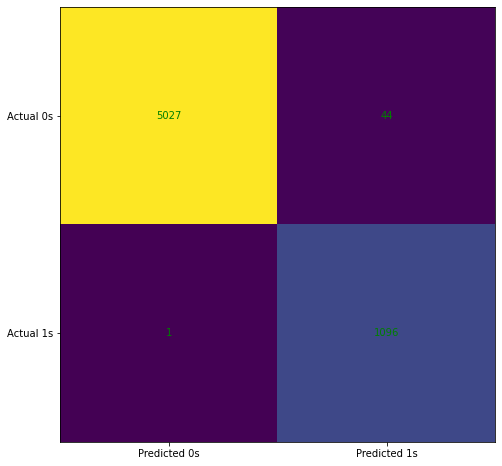

In [ ]:
#visualize the confusion matrix as a heat map
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_mat) #imshow is the image show function
ax.grid(False) # disable the grid lines
#divide the plot into 4 sections
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='green')
plt.show()